## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training

#### 1) Problem Statement

- This Project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, 
Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection
- Data source -http://roycekimmons.com/tools/generated_data/exams
- The data consists of 8 column and 1000 rows.


#### 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from src.Scripts.data_explore import Explore_Data


In [2]:
df= pd.read_csv('data/exams.csv')

#### Dataset information
- Gender : sex of students -> (Male/Female)
- race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
- parental level of education : parent's final education -> (bachelor's degree , some college, master's degree, associate's degree, High School)
- lunch: having lunch before test(standard or free/reduced)
- test preparation course : complete or not complete before test 
- math score: The student's score on a standardized reading test
- reading score: The student's score on a standardized writing test 
- writing score: The student's score on a standardized mathematics test

#### Data Checks to perform 
- Check Missing Values
- Check Duplicates
- Check data types
- Check the numbers of unique values of each column
- Check statistics of dataset
- Check various categories of present in the different categorical column


#### Check the Missing values

In [3]:
print(Explore_Data(df))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

---


First 5 rows


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


---


Shape of the dataset


(1000, 8)

---


Duplication values count


0


Missing values count


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Unique values


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64


Check statistics of data set


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 67.81 and 70.382
- All standard deviations are also close - between 14.11 and 15.25
- While there is a minimum score 15 for math, for writing minimum is much higher 15 and for reading score of 25 


#### Exploring Data

In [4]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'parental level of education' variable:   ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['completed' 'none']


In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features =[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding columns for "Total Score" and "Average"

In [6]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [7]:
reading_full = df[df['reading score']==100]['average'].count()
wirting_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {wirting_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 9
Number of students with full marks in Writing: 13
Number of students with full marks in Reading: 10


In [8]:
reading_less_20 = df[df['reading score']<=20]['average'].count()
wirting_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {wirting_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 2
Number of students with less than 20 marks in Writing: 2
Number of students with less than 20 marks in Reading: 0


##### Insights
 - From the above values we get students have performed the worst in Maths
 - Best Performance is in reading section

#### Exploring Data (Visualization)

- Histogram
- Kernel DistributionFunction(KDE)
- Mult Variate

####  Mult Variate

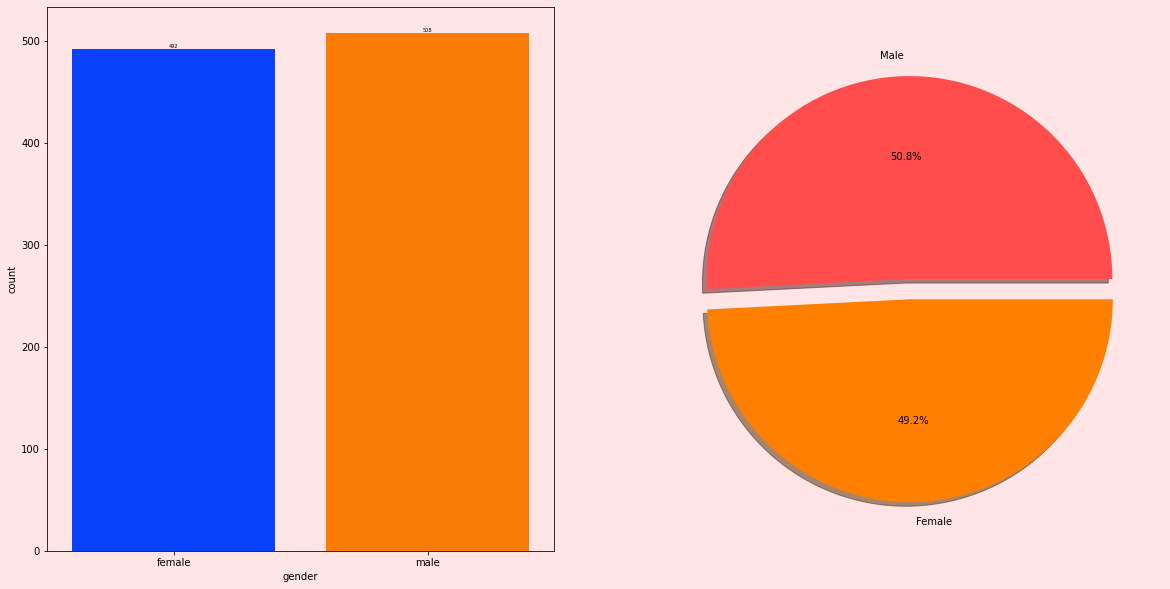

In [31]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
sns.countplot(data=df, x=df['gender'], palette='bright', ax=axs[0],saturation=0.95)
for container in axs[0].containers:
  axs[0].bar_label(container,color='black',size=5)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

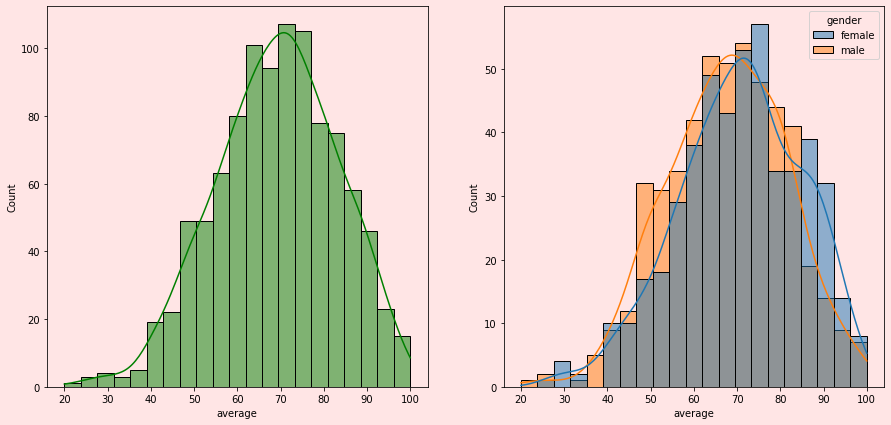

In [33]:
fig, axs = plt.subplots(1,2 , figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True, hue='gender')
plt.show()


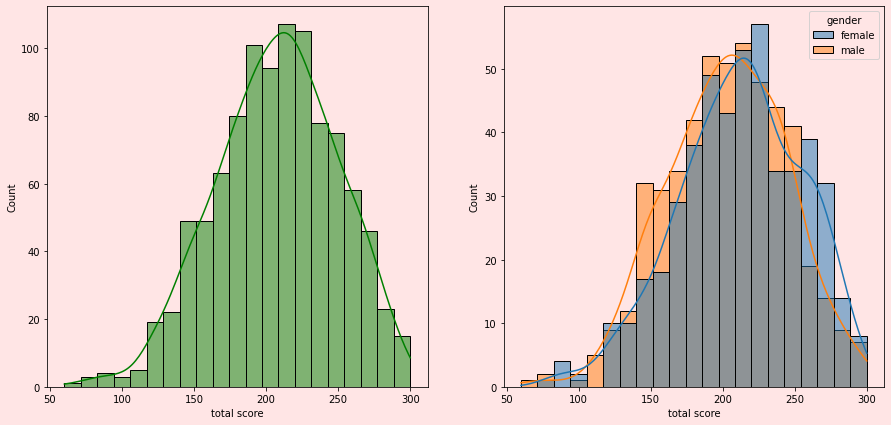

In [34]:
fig, axs = plt.subplots(1,2 , figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score',kde=True, hue='gender')
plt.show()

##### Insights

- Female students tend to perform well than male students.

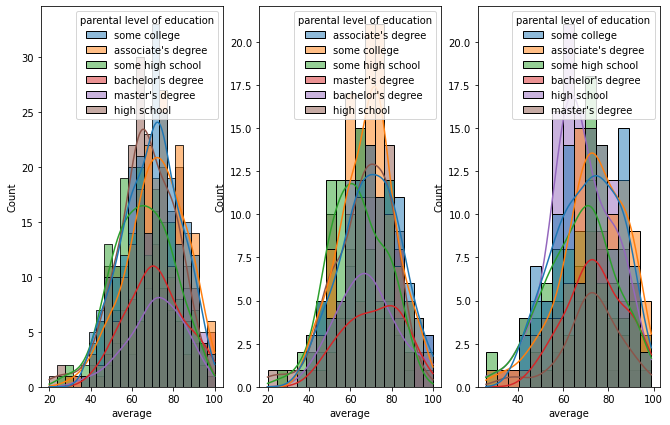

In [11]:
fig, axs = plt.subplots(1,2 , figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue='parental level of education')

plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='parental level of education')
plt.show()

#### Pairplot for Variable Pairs' Analysis

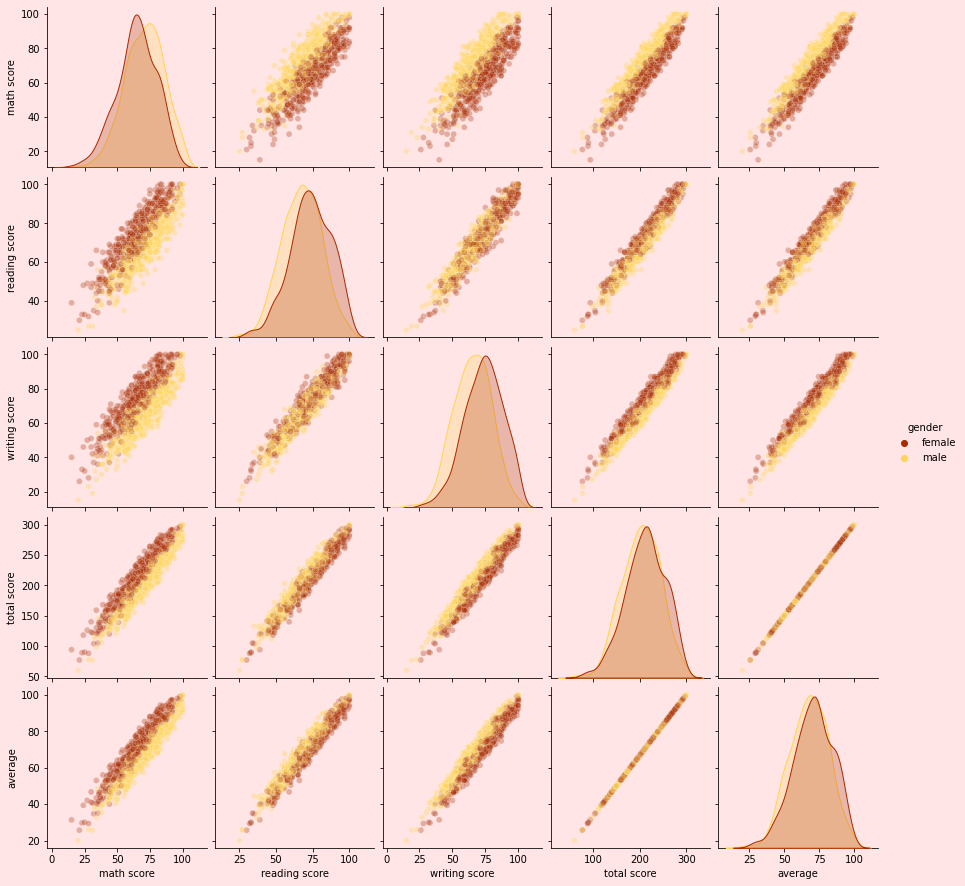

In [13]:
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"

sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.3},palette='afmhot')
plt.show()

#### Heatmap

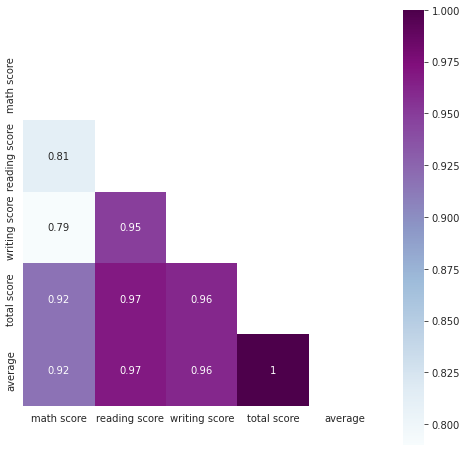

In [18]:
corr = df.corr()
mask = np.zeros_like(corr) # zeros matrix fill the cells with 0.
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,vmax=1, annot_kws={"size":10},cmap="BuPu",annot=True)